No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Feature importances: [0.2762735  0.07126861 0.05290693 0.03258734 0.00988099 0.04113288
 0.007806   0.03499383 0.01361891 0.01228624 0.01963376 0.0813019
 0.06267846 0.02105859 0.01417372 0.01006462 0.06040738 0.02988533
 0.04464413 0.01963948 0.03800493 0.04284716 0.         0.0029053 ]
accuracy =  0.9099368560983716
Confusion Matrix:
 [[2621   50]
 [ 221  117]]
AUC: 0.825


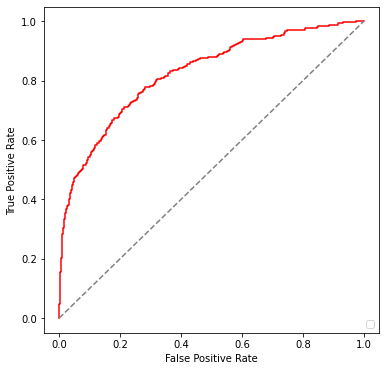

In [61]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, roc_curve, RocCurveDisplay, roc_auc_score,accuracy_score
import matplotlib.pyplot as plt

# Clear workspace
import gc
gc.collect()

# Set the working directory

# Read in data
data = pd.read_csv("p2p.csv")
data = data.drop(columns=["Unnamed: 0"])
data['status.bin'] = data['status'].astype('category')

data['status'] = data['status'].astype('category').cat.codes
# Select specific columns
'''selected_columns = ['ratio002', 'ratio003', 'ratio004', 'ratio005', 'ratio006',
                    'ratio011', 'ratio012', 'DPO', 'DSO', 'turnover', 'ratio036', 
                    'ratio037', 'ratio039', 'ratio040']
data = data[selected_columns + ['status']]'''

# Split into training and test data
X = data.drop('status.bin', axis=1)
X = X.drop('status', axis=1)
y = data['status.bin']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

# G model
model_gb = GradientBoostingClassifier(n_estimators=1000, learning_rate=0.1, max_depth=1, min_samples_leaf=10, subsample=0.5, random_state=1234)
model_gb.fit(X_train, y_train)

# Insights and variable importance
feature_importance = model_gb.feature_importances_
print("Feature importances:", feature_importance)

# Predictions on test set
pred_gb = model_gb.predict_proba(X_test)[:, 1]

# Threshold function
def threshold(data, thresh=0.5):
    return (data > thresh).astype(int)

pred_gb_bin = threshold(pred_gb)
accuracy = accuracy_score(y_test, pred_gb_bin)
print("accuracy = ", accuracy)
# Confusion matrix
conf_matrix = confusion_matrix(y_test, pred_gb_bin)
print("Confusion Matrix:\n", conf_matrix)

# ROC curve
fpr, tpr, _ = roc_curve(y_test, pred_gb)
# Create a figure and an axes with a specific size
fig, ax = plt.subplots(figsize=(6, 6))
auc_score = roc_auc_score(y_test, pred_gb)
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr)

print("AUC: {:.3f}".format(auc_score))
roc_display.plot(ax=ax, color='red')
ax.plot([0,1],[0,1],linestyle = '--',color = 'gray')
plt.savefig("GB.png",transparent = True)
plt.show()



/Users/xrz/.local/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Feature importances: [0.058 0.023 0.062 0.097 0.016 0.063 0.042 0.076 0.021 0.051 0.054 0.004
 0.104 0.051 0.007 0.02  0.021 0.02  0.077 0.123 0.    0.003 0.003 0.004]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


accuracy =  0.9076105018278497
Confusion Matrix:
 [[2618   53]
 [ 225  113]]
AUC: 0.825


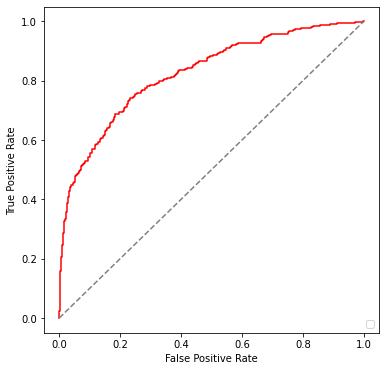

In [59]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, roc_curve, RocCurveDisplay, roc_auc_score,accuracy_score

import matplotlib.pyplot as plt

# Clear workspace
import gc
gc.collect()

# Set the working directory
import os


# Read in data
data = pd.read_csv("p2p.csv")
data = data.drop(columns=["Unnamed: 0"])
data['status.bin'] = data['status'].astype('category')

data['status'] = data['status'].astype('category').cat.codes

# Split into training and test data
X = data.drop('status', axis=1)
X= X.drop('status.bin', axis=1)
y = data['status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

# AdaBoost with a decision tree as base estimator
base_estimator = DecisionTreeClassifier(max_depth=1, min_samples_leaf=10)
model_ada = AdaBoostClassifier(base_estimator=base_estimator, n_estimators=1000, learning_rate=0.1, random_state=1234)
model_ada.fit(X_train, y_train)
# Insights and variable importance
feature_importance = model_ada.feature_importances_
print("Feature importances:", feature_importance)

# Predictions on test set
pred_ada = model_ada.predict_proba(X_test)[:, 1]

# Threshold function
def threshold(data, thresh=0.5):
    return (data > thresh).astype(int)

pred_ada_bin = threshold(pred_ada)
accuracy = accuracy_score(y_test, pred_ada_bin)
print("accuracy = ", accuracy)
# Confusion matrix
conf_matrix = confusion_matrix(y_test, pred_ada_bin)
print("Confusion Matrix:\n", conf_matrix)

# ROC curve
fpr, tpr, _ = roc_curve(y_test, pred_ada)
# Create a figure and an axes with a specific size
fig, ax = plt.subplots(figsize=(6, 6))
auc_score = roc_auc_score(y_test, pred_ada)
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr)

print("AUC: {:.3f}".format(auc_score))
roc_display.plot(ax=ax, color='red')
ax.plot([0,1],[0,1],linestyle = '--',color = 'gray')
plt.savefig("Ada.png",transparent = True)
plt.show()



/Users/xrz/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


accuracy =  0.9016284479893653
Confusion Matrix:
 [[2602   69]
 [ 227  111]]
AUC: 0.828


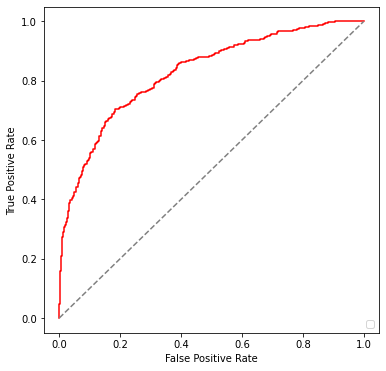

In [58]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, roc_curve, RocCurveDisplay,roc_auc_score,accuracy_score
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

# Clear workspace
import gc
gc.collect()


# Read in data
data = pd.read_csv("p2p.csv")
data = data.drop(columns=["Unnamed: 0"])
data['status.bin'] = data['status'].astype('category')

data['status'] = data['status'].astype('category').cat.codes

# Split into training and test data
X = data.drop('status', axis=1)
X= X.drop('status.bin', axis=1)
y = data['status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)
# XGBoost model
model_xgb = XGBClassifier(n_estimators=1000, learning_rate=0.1, max_depth=3, min_child_weight=10, subsample=0.5, colsample_bytree=0.5, objective='binary:logistic', random_state=1234)
model_xgb.fit(X_train, y_train, eval_metric='logloss')

# Predictions on test set
pred_xgb = model_xgb.predict_proba(X_test)[:, 1]

# Threshold function to convert probabilities to binary class
def threshold(data, thresh=0.5):
    return (data > thresh).astype(int)

pred_xgb_bin = threshold(pred_xgb)
accuracy = accuracy_score(y_test, pred_xgb_bin)
print("accuracy = ", accuracy)
# Confusion matrix
conf_matrix = confusion_matrix(y_test, pred_xgb_bin)
print("Confusion Matrix:\n", conf_matrix)

# ROC curve
fpr, tpr, _ = roc_curve(y_test, pred_xgb)

# Create a figure and an axes with a specific size
fig, ax = plt.subplots(figsize=(6, 6))
auc_score = roc_auc_score(y_test, pred_xgb)
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr)

print("AUC: {:.3f}".format(auc_score))
roc_display.plot(ax=ax, color='red')
ax.plot([0,1],[0,1],linestyle = '--',color = 'gray')
plt.savefig("XGB.png",transparent = True)
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


accuracy =  0.902625456962446
Confusion Matrix:
 [[2646   25]
 [ 268   70]]
AUC: 0.792


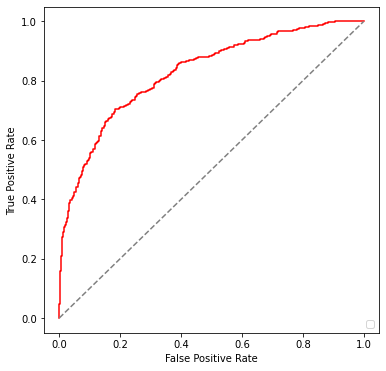

In [57]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_curve, RocCurveDisplay,roc_auc_score,accuracy_score
import matplotlib.pyplot as plt

# Clear workspace
import gc
gc.collect()

# Read in data
data = pd.read_csv("p2p.csv")
data = data.drop(columns=["Unnamed: 0"])
data['status.bin'] = data['status'].astype('category')

data['status'] = data['status'].astype('category').cat.codes

# Split into training and test data
X = data.drop('status', axis=1)
X= X.drop('status.bin', axis=1)
y = data['status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

# Logistic Regression model
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)

# Predictions on test set
pred_log = log_model.predict_proba(X_test)[:, 1]

# Threshold function to convert probabilities to binary class
def threshold(data, thresh=0.5):
    return (data > thresh).astype(int)

pred_log_bin = threshold(pred_log)
accuracy = accuracy_score(y_test, pred_log_bin)
print("accuracy = ", accuracy)
# Confusion matrix
conf_matrix = confusion_matrix(y_test, pred_log_bin)
print("Confusion Matrix:\n", conf_matrix)

# Create a figure and an axes with a specific size
fig, ax = plt.subplots(figsize=(6, 6))
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr)
auc_score = roc_auc_score(y_test, pred_log)
print("AUC: {:.3f}".format(auc_score))
roc_display.plot(ax=ax, color='red')
ax.plot([0,1],[0,1],linestyle = '--',color = 'gray')
plt.savefig("LR.png",transparent = True)
plt.show()
